In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

## Download Omniglot Dataset

Omniglot contains multiple character sets both real and fictional. Aurek-Besh (literally "A, B") is the Star Wars' universe's alphabet also known as Aurebesh and is used for writing Galactic Basic (a fictional lingua franca). It is one of the folders/languages within Ominglot. It in turn contains 26 subfolders with 20 image files each. Each subfolder maps to one of 26 letters in the English alphabet. 

Here are some steps that aren't being done within the notebook; so do it the old fashioned way - on the command line.

1. git clone https://github.com/rsanjabi/omniglot.git into proper directory (data/)
2. cd data/omniglot/python 
3. unzip images_evaluation
4. cd Aurek-Besh
5. rename folders from'character01' to 'A' for ease of understanding

In [3]:
path = Path('data/omniglot/python/images_evaluation/Aurek-Besh')
path.ls()

[PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/C'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/G'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/W'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/Q'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/models'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/H'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/I'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/J'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/X'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/D'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/Z'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/P'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/U'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-Besh/L'),
 PosixPath('data/omniglot/python/images_evaluation/Aurek-

## Examine Dataset

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

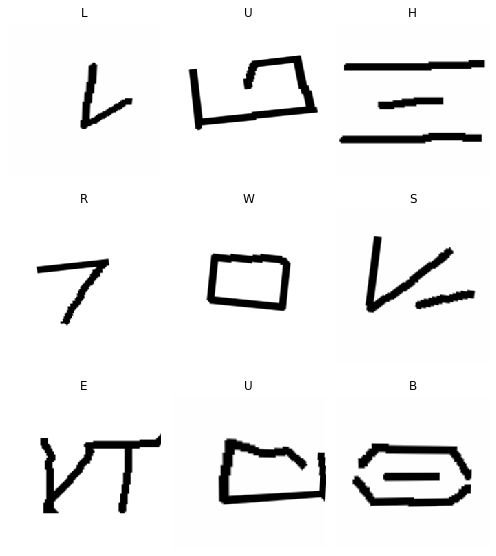

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['A',
  'B',
  'C',
  'D',
  'E',
  'F',
  'G',
  'H',
  'I',
  'J',
  'K',
  'L',
  'M',
  'N',
  'O',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'U',
  'V',
  'W',
  'X',
  'Y',
  'Z'],
 26,
 416,
 104)

## Train model

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.676472,3.489778,0.875000,00:06
1,3.297750,1.740174,0.519231,00:02
2,2.453107,1.027173,0.326923,00:02
3,1.975695,0.969526,0.307692,00:02


In [10]:
learn.save('stage-1')

In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


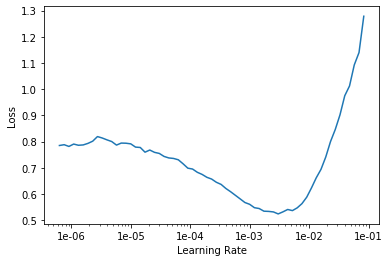

In [13]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.792352,0.992371,0.269231,00:03
1,0.654488,0.779698,0.201923,00:03
2,0.547822,0.553973,0.163462,00:03
3,0.479602,0.403987,0.105769,00:03


In [15]:
learn.save('stage-2')

## Interpretation

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused(min_val=1)

In [ ]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))